# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> FINAL PROJECT (ML - Module 505)</p>

In [1]:
from IPython.display import HTML

header = """
<img src="https://www.gisma.com/media/1198/gisma-business-school-logo.svg" 
width="240" height="240"style="margin-left:auto ;margin-right:auto "/>'
"""
HTML(header)

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> Business Problem Understanding</p>

**CCP (Churn Customer Prediction):**

The chosen dataset from Kaggle is a great resource for predicting customer churn in the telco industry. It contains 7,000 records and 20 features that can be used to analyze customer behavior and identify those at risk of churning. The target feature of the dataset is the "Churn" column which contains either "Yes" or "No" values indicating whether or not the customer has churned. With this dataset, we can apply various Machine Learning algorithms to predict customer churn and develop strategies to retain customers.

Following my experience and career in Telco Industry (MTN-Irancell), prediction on churn and how to increase the revenue of the company with different campaigns and make the customer more loyal is one of the most challenging problems which the baseline of all actions is to know the churn ratio on our products and our customers.

One of the most common algorithms used in this dataset is Decision Tree. Decision Tree is a type of supervised learning algorithm that is used to classify data by building decision trees based on the features of the data. It works by splitting the data into different branches based on the features of the data, such as customer age, contract type, and payment method. This algorithm can be used to predict customer churn by analyzing the different branches of the decision tree and identifying the ones that are more likely to lead to churn. we will test this algorithm beside other ML algorithms to identify is it still a best choice or we could choose other ones considering more metrics.

Different ML classification techniques, including Decision Tree, SVM, Gaussian Naive Bayes, Logistic Regression and Random Forest, were tested for this aim. Each approach has advantages and disadvantages, and using various measurement criteria, we will select one of them and provide our hypothesis.

**Dataset Download link:**

https://drive.google.com/drive/folders/1tVeHMCC-L7UBGAf5vRRHrLr8qhdkKtRs

# <p style=" font-family:calibri; font-size:70%; text-color:Black; text-align:center;color:black" id="data"> Variable Description</p>


|Row #|Attribute|Description|
|:--------|:-------|:---------|
|1|customerID|Unique Values|
|2|gender|Whether the customer is a male or a female|
|3|SeniorCitizen|Indicates if the customer is 65 or older (1, 0)|
|4|Partner|Whether the customer has a partner or not (Yes, No)|
|5|Dependents|Whether the customer has dependents or not (Yes, No)|
|6|Tenure|Number of months the customer has stayed with the company|
|7|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|8|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|9|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|10|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|11|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|12|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|13|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|14|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|15|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|16|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|17|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|18|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|19|MonthlyCharges|The amount charged to the customer monthly|
|20|TotalCharges|The total amount charged to the customer|
|21|Churn|Customers who left within the last month, the column is called Churn (Yes or No)|


# Table of Contents
01. [Importing Libraries](#Importing-Libraries)
02. [Data Collection](#Data-Collection)
03. [Preprocessing and Data Exploration](#Preprocessing-and-Data-Exploration)
04. [Splitting Dataset to Test and Train](#Splitting-Dataset-to-Test-and-Train)
05. [Feature Engineering](#Feature-Engineering)
06. [Model Assessment](#Model-Assessment)
07. [Model Selection](#Model-Selection)
08. [Conclusion](#Conclusion)
09. [Reference](#Reference)

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 1. Importing Libraries</p>


In [2]:
# System libraries
import time

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Url
import urllib.request
import shutil

# Preprocessing
from sklearn.preprocessing import StandardScaler
import imblearn.over_sampling

# Oversampling
from imblearn.over_sampling import RandomOverSampler

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import model_selection

# Evaluation
from sklearn.metrics import confusion_matrix

**Library Description**

| Row | Library Name | Description |
|:-------------: |:------------ |:----------- |
| 01 | Pandas | Used for data manipulation and analysis. It provides high-performance, easy-to-use data structures and tools for data analysis. |
| 02 | Numpy | Used for numerical computing, linear algebra, and random number generation. It provides fast computation, convenience and powerful data structures. |
| 03 | Matplotlib | Used for data visualization. It provides a variety of plots, charts, and graphs for data analysis. |
| 04 | Seaborn | Used for visualizing statistical models and data. It provides a high-level interface for drawing attractive and informative statistical graphics. |
| 05 | Time | Used to calculate computation time in some block codes. |
| 06 | Urllib.request | Used for making HTTP requests. It provides a simple API for making HTTP requests. |
| 07 | Shutil | Used for file operations. It provides an API for copying, moving, and removing files and directories. |
| 08 | IPython.display | Used for displaying data in a variety of formats. It provides an API for displaying data in a variety of formats such as HTML, Markdown, and LaTeX. |
| 09 | Scikit-Learn | Used for machine learning. It provides a wide range of supervised and unsupervised learning algorithms such as regression, classification, clustering, and feature engineering. |

---

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 2. Data Collection</p>


**Download Dataset**

In [3]:
url = "https://drive.google.com/uc?export=download&id=1-1yho1b7l2nGX7C0taSKmyxyT9C-rGti"

filename = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

with urllib.request.urlopen(url) as response, open(filename, "wb") as out_file:
    shutil.copyfileobj(response, out_file)
    print("Download complete!")

Download complete!


| Description |
|:--------|
|Above block code block downloads used dataset from Google Drive and saves it to a specified filename. The "with" statement then opens a connection to the URL and opens the filename for writing. The shutil.copyfileobj function then copies the data from the URL to the file.|

---

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.set_index("customerID")
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


**Description**

Importing our dataset and indexing customerID as it is a unique ID, it is not a feature that we need to use for our model and representing first three rows.    

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 3. Preprocessing and Data Exploration</p>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

**Description**

Observing the Data types of variables in the dataset.    

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(r"\s+", np.nan, regex=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 110.0+ KB


| Description |
|:--------|
|As data explored "TotalCharges" field which contains a numeric value should be a float datatype by nature. Above block codes are used to convert the string values in the "TotalCharges" column to numeric values in main dataframe. It begins by replacing any whitespace in the column with NaN values, and then uses the pandas to_numeric method to convert the values to numerical types. Finally, the info() method is used to display information about the column, including the number of non-null values.

---

In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Description**

The following lines indicated 11 null values and as it is Ignorable we drop them as part of the data cleaning process.

In [8]:
df.dropna(inplace=True)

| Description |
|:--------|
|Above block code drops all of the rows containing null values from the dataframe. This is done using the dropna() method, which takes the argument 'inplace=True' to indicate that the changes should be made in the original dataframe.|

---

**Duplicate Checking**

In [9]:
duplicate = df[df.duplicated()]
print(
    "Duplicate Rows except first occurrence based on all columns are:",
    duplicate["Churn"].count(),
)
duplicate.head(2)

Duplicate Rows except first occurrence based on all columns are: 22


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
9117-SHLZX,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1934-SJVJK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


| Description |
|:--------|
|As indicated above duplication occurred due to indexing of CustomerID field, naturally, there is no duplication, therefore there is no action required and we will leave it as is.|

---

**Missing Values**

In [10]:
miss = df.isnull().sum().sort_values(ascending=False).head(10)
miss_per = round(miss / len(df) * 100, 2)
pd.DataFrame({"Null Values (Count)": miss, "Percentage (%)": miss_per.values})

,Null Values (Count),Percentage (%)
gender,0,0.0
SeniorCitizen,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


| Description |
|:--------|
|The above block code block calculates the total number of missing values in the dataframe (df) and the percentage of missing values in each column.Presentation of Null Values, As it is sorted as Descending there are no missing values; the first 10 rows are selected.|

---


**Data Exploration [Plots]**

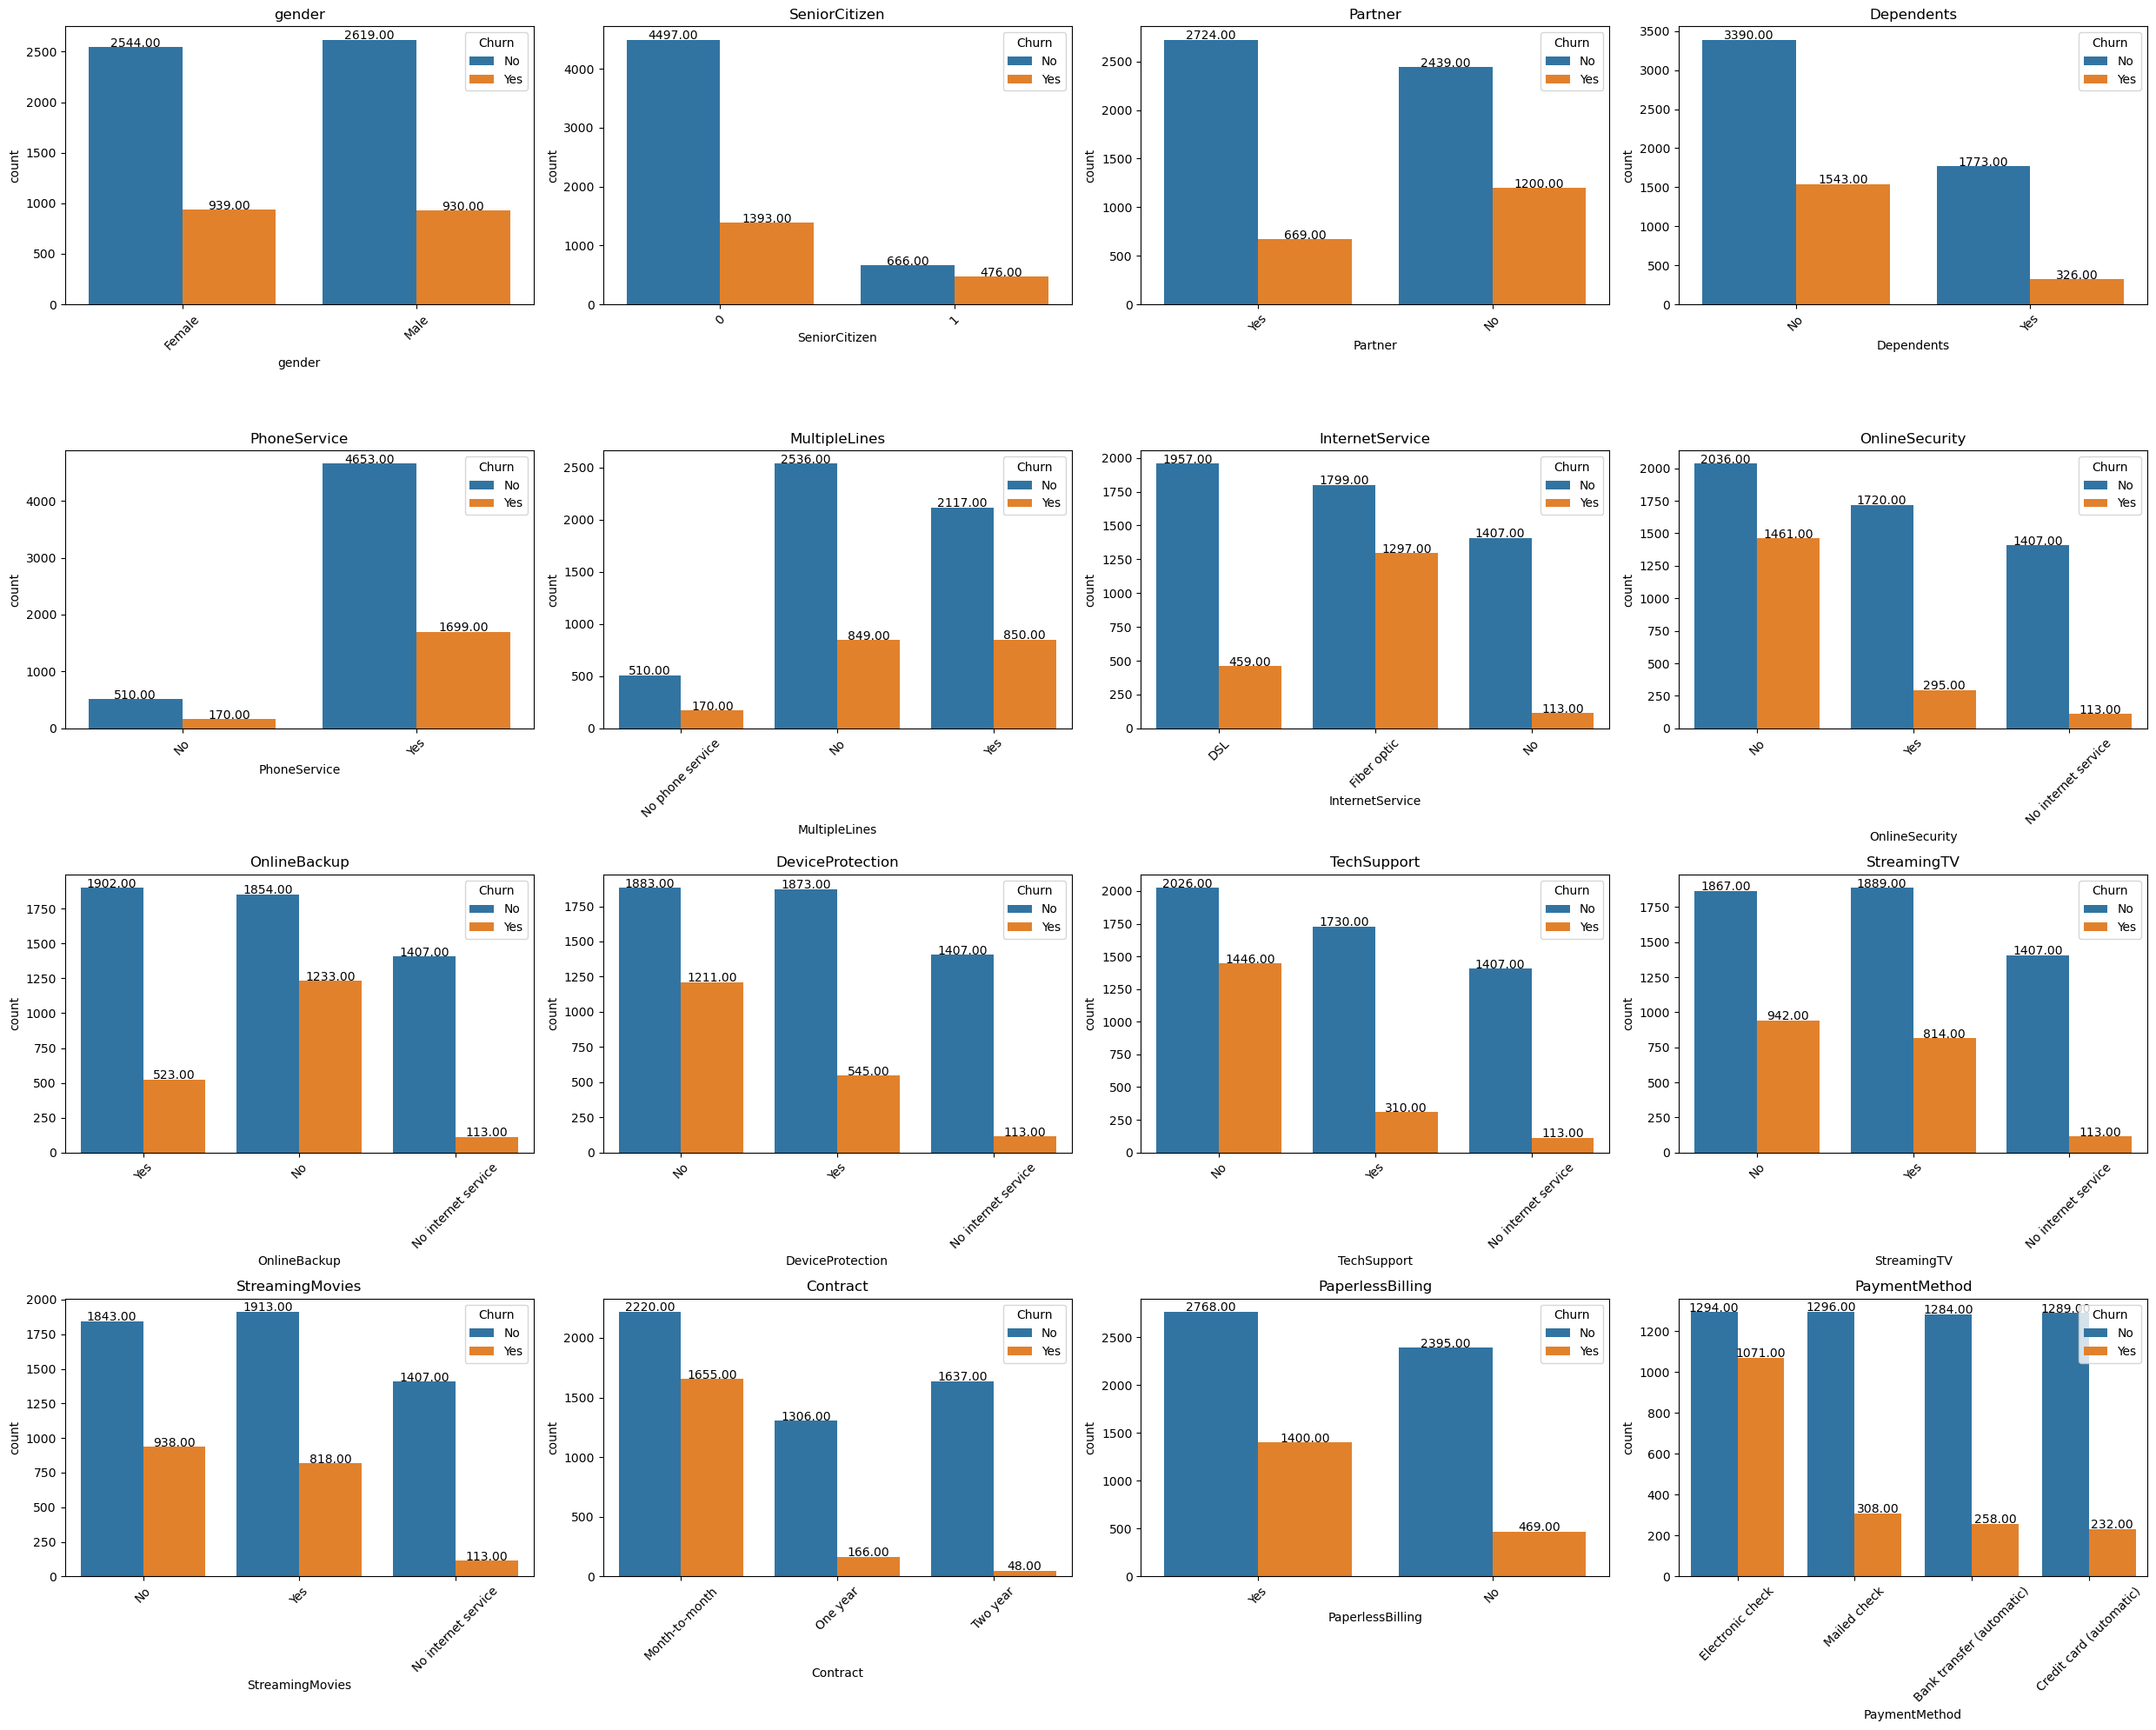

In [11]:
fig, ax = plt.subplots(4, 4, figsize=(25, 20))

df_column = """ 
    gender SeniorCitizen Partner Dependents  PhoneService
    MultipleLines InternetService OnlineSecurity OnlineBackup 
    DeviceProtection TechSupport StreamingTV StreamingMovies 
    Contract PaperlessBilling PaymentMethod 
"""

plt_drw = df_column.split()

for i, axi in enumerate(ax.flat):
    sns.countplot(x=plt_drw[i], hue="Churn", data=df, ax=axi)
    axi.set_title(plt_drw[i])
    axi.set_xticklabels(axi.get_xticklabels(), rotation=45)
    for p in axi.patches:
        height = p.get_height()
        axi.text(
            p.get_x() + p.get_width() / 2.0,
            height + 3,
            "{:1.2f}".format(height),
            ha="center",
        ) 

plt.tight_layout()


**Description**

To get some insights from the above dataset, some charts and graphs are added:
All graphs show the total diversity and correlation of most features with our target label "Churn". As an example distribution of Male and Female customers in churn is almost the same.
For senior citizens (those above 65 years old) significantly are low in the margin but in relation to churn rate is high.
For each plot, we have a similar analysis and to avoid making long explanations we will keep going with the rest of the activities for the ML pipeline.|

* To avoid repeating in coding, we get the column headers as text and put them in a for loop to generate for each column similar plot.

---

**Total Churn Disstirbution**

Active Subs:  5,163
Churn Subs:  1,869


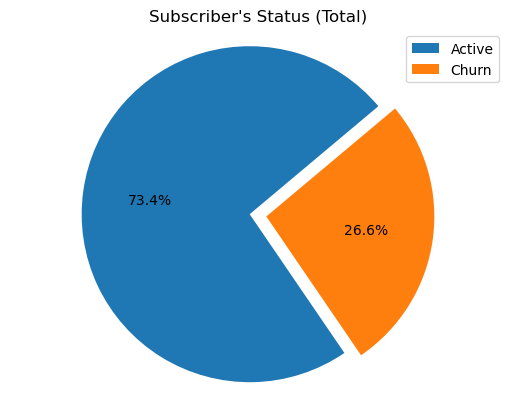

In [12]:
def plot_pie_chart(data, name):
    active = data[(data["Churn"] == "No")].count()[1]
    churn = data[(data["Churn"] == "Yes")].count()[1]

    print("Active Subs: ", f"{active:,}")
    print("Churn Subs: ", f"{churn:,}")

    sizes = [active, churn]
    labels = "Active", "Churn"
    explode = (0, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, autopct="%1.1f%%", startangle=40)
    ax1.axis("equal")
    ax1.set_title(f"Subscriber's Status ({name})")
    ax1.legend(labels)
    plt.show()


plot_pie_chart(df, "Total")

| Description |
|:--------|
|As our target:(Y) is the "Churn" column, therefore we explore a graphical distribution of churned and active customers as above to identify whether our data is balanced or not, in the case of imbalanced data we need to balance and normalize it.|

---

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 4. Splitting Dataset to Test and Train</p>

In [13]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

| Description |
|:--------|
|The above block code splits the dataframe `df` into two sets, `x` and `y`. `x` contains all the features of the dataframe, minus the target variable `Churn`, while `y` contains only the target variable `Churn`. The two sets are then further split into training and testing sets, `x_train` and `x_test` for the features, and `y_train` and `y_test` for the target variable. This allows us to train and evaluate our machine learning models on different datasets.
By default, sklearn.model_selection.train_test_split() splits the data into a 75% training set and 25% testing set.|

----

In [14]:
print("Training Dataset:")
print(f"Shape: {x_train.shape}")
print(f"Dimension: {x_train.ndim}")
print(f"Size: {x_train.size}", "\n")
print("Test Dataset:")
print(f"Shape:{x_test.shape}")
print(f"Dimension:{x_test.ndim}")
print(f"Size:{x_test.size}")

Training Dataset:
Shape: (5274, 19)
Dimension: 2
Size: 100206 

Test Dataset:
Shape:(1758, 19)
Dimension:2
Size:33402


| Description |
|:--------|
|The above code prints the size, dimension and shape of the training and test datasets. and return the number of rows in the respective datasets. The f-string is used to print the string with the value from the respective variables.|

---

In [15]:
display("Train Dataset:", x_train.head(1), "Test Dataset:", x_test.head(1))

'Train Dataset:'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
5377-NDTOU,Female,0,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,91.05,6293.75


'Test Dataset:'

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2


In [16]:
display("Train Dataset:", y_train.head(2), "Test Dataset:", y_test.head(2))

'Train Dataset:'

customerID
5377-NDTOU    No
2266-SJNAT    No
Name: Churn, dtype: object

'Test Dataset:'

customerID
1867-BDVFH    Yes
1619-YWUBB     No
Name: Churn, dtype: object

**Description**
 
The above two block codes prints our datasets.

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 5. Feature Engineering</p>


To Use ML algorithms all features must be converted to numeric, therefore we explore the data to investigate non-numeric features and convert them to numerical values based on existing methods.

In [17]:
df.describe(include=["object"]).T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


| Description |
|:--------|
|The above code provides a summary of all the object data types in a given dataframe. It returns the count, unique values, top values and the frequency of the top values for each column of the dataframe.|

---

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


| Description |
|:--------|
|The above code displays a Numerical summary of related dataset. The `.T` attribute is used to transpose the output so that the columns and rows are reversed, making the output easier to read.

---

In [19]:
data = []

for i in df.select_dtypes(include="object"):
    data.append(
        [i.ljust(15), str(df[i].unique()).ljust(30), str(df[i].nunique()).ljust(20)]
    )

table = pd.DataFrame(
    data, columns=["Column", "Unique Values", "Count of Unique Values"]
)

table
table.style.set_properties(**{"text-align": "left"}).set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
)

,Column,Unique Values,Count of Unique Values
0,gender,['Female' 'Male'],2
1,Partner,['Yes' 'No'],2
2,Dependents,['No' 'Yes'],2
3,PhoneService,['No' 'Yes'],2
4,MultipleLines,['No phone service' 'No' 'Yes'],3
5,InternetService,['DSL' 'Fiber optic' 'No'],3
6,OnlineSecurity,['No' 'Yes' 'No internet service'],3
7,OnlineBackup,['Yes' 'No' 'No internet service'],3
8,DeviceProtection,['No' 'Yes' 'No internet service'],3
9,TechSupport,['No' 'Yes' 'No internet service'],3


| Description |
|:--------|
|The above block code is used to generate a table of summary statistics for each categorical variable. The code first creates an empty list called 'data'. Then, a loop is used to iterate through each categorical variable in the DataFrame, and append the variable name, the list of unique values, and the count of unique values to the list 'data'. Finally, the list 'data' is used to create a DataFrame called 'table' with three columns - 'Column', 'Unique Values', and 'Count of Unique Values'. The table is then styled for better readability.|

---

### Label Encoding

**OneHot Encoding**

In [20]:
x_train.loc[
    :,
    [
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
    ],
] = x_train.loc[
    :,
    [
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
    ],
].astype(
    "category"
)

x_train = x_train.apply(lambda x: x.cat.codes if x.dtype == "category" else x)

| Description |
|:--------|
|The above code converts the categorical values in the x_train dataframe to numerical values using the astype() method. This is done as the machine learning algorithms used in this project require numerical values as input. The categorical columns to be converted are specified in the list and then the cat.codes method is used to convert the values to numerical codes.

----

In [21]:
enc = OneHotEncoder()

enc_data = pd.DataFrame(
    enc.fit_transform(
        x_train[
            [
                "gender",
                "Partner",
                "Dependents",
                "PhoneService",
                "MultipleLines",
                "InternetService",
                "OnlineSecurity",
                "OnlineBackup",
                "DeviceProtection",
                "TechSupport",
                "StreamingTV",
                "StreamingMovies",
                "Contract",
                "PaperlessBilling",
                "PaymentMethod",
            ]
        ]
    ).toarray()
)

coded_df = x_train.join(enc_data)

| Description |
|:--------|
|One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The aim is to transform the categorical variables into a form that could be provided to ML algorithms to do a better job in prediction. One-hot encoding is the process of converting categorical variables into a binary form. This is done by creating a new binary column for each category and assigning a 1 or 0 (True/False) value to the column.|
|In the above code, we are using one-hot-encoder to convert the categorical variables into a binary form. This is done by creating a new binary column for each category and assigning a 1 or 0 (True/False) value to the column. This allows the ML algorithms to better understand the data and make more accurate predictions.|

---

In [22]:
x_test.loc[
    :,
    [
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
    ],
] = x_test.loc[
    :,
    [
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
    ],
].astype(
    "category"
)

x_test = x_test.apply(lambda x: x.cat.codes if x.dtype == "category" else x)

| Description |
|:--------|
|The above code converts the categorical values in the x_test dataframe to numerical values using the `astype()` method. This is done as the machine learning algorithms used in this project require numerical values as input. The categorical columns to be converted are specified in the list and then the `cat.codes` method is used to convert the values to numerical codes.

---

In [23]:
enc = OneHotEncoder()

enc_data = pd.DataFrame(
    enc.fit_transform(
        x_test[
            [
                "gender",
                "Partner",
                "Dependents",
                "PhoneService",
                "MultipleLines",
                "InternetService",
                "OnlineSecurity",
                "OnlineBackup",
                "DeviceProtection",
                "TechSupport",
                "StreamingTV",
                "StreamingMovies",
                "Contract",
                "PaperlessBilling",
                "PaymentMethod",
            ]
        ]
    ).toarray()
)

coded_test_df = x_test.join(enc_data)

| Description |
|:--------|
|One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The aim is to transform the categorical variables into a form that could be provided to ML algorithms to do a better job in pediction. One-hot encoding is the process of converting categorical variables into a binary form. This is done by creating a new binary column for each category and assigning a 1 or 0 (True/False) value to the column.|
|In the above code, we are using one-hot-encoder to convert the categorical variables into a binary form. This is done by creating a new binary column for each category and assigning a 1 or 0 (True/False) value to the column. This allows the ML algorithms to better understand the data and make more accurate predictions.|

---

In [24]:
y_train = y_train.replace({"Yes": 1, "No": 0})
y_test = y_test.replace({"Yes": 1, "No": 0})

| Description |
|:--------|
|The above code is replacing the "Yes" and "No" values in the y_train and y_test dataframes with 1 and 0 respectively. This is done to make the data easier to use in the machine learning algorithms.|

---

**Over Sampling**

In [25]:
ros = RandomOverSampler(random_state=42)
x_train, y_train = ros.fit_resample(x_train, y_train)

| Description |
|:--------|
|The above block of code is using RandomOverSampler to perform oversampling on the training data. Oversampling is used to balance dataset when there is a class imbalance. By oversampling, it increases the number of instances in the minority class, so the model can better learn and classify the minority class. Oversampling is generally used when the cost of misclassifying the minority class is high. In this example, oversampling is used to balance the dataset by duplicating the instances in the minority class. RandomOverSampler is used in this example which randomly duplicates the instances in the minority class until the class balance is equal.|

---

**Standardization**

As our features have different scales like gender and other categories most are boolean, but tenure is counting months, on the other hand, we have prices like Total Charges and Monthly charges which are money but there is no preferably among them and all features weight is same. therefore we use the standardization model to rescale our feature to prevent bias in our prediction.

In [26]:
scaler = sklearn.preprocessing.StandardScaler(with_mean=False)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print("x_train Size", x_train.shape)
print("x_test size", x_test.shape)

x_train Size (7814, 19)
x_test size (1758, 19)


| Description |
|:--------|
|The above block code is using a StandardScaler function from the sklearn library to rescale the data in the x_train and x_test arrays. The StandardScaler function subtracts the mean of each feature from the respective values and divides by the standard deviation. This helps the data conform to a normal distribution.|
|As our features have different scales like gender and other categories most are boolean, but tenure is counting months, on the other hand, we have prices like Total Charges and Monthly charges which are money but there is no preferably among them and all features weight is same. therefore we use the standardization model to rescale our feature to prevent bias in our prediction.|

---

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 6. Model Assessment</p>


## Model Selection and Hyperparameter Tunning

In the following steps, we will tune some Hyperparameters which were important according to Scikit-learn documentation.

below Classification algorithms are selected and will be tuned:

Row | Name | Source 
:--- | :--- | :--- 
1 | Decision Tree | [Sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
2 | Support Vector Machines (SVMs) | [Sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
3 | Gaussian Naive Bayes | [Sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
4 |  Logistic Regression | [Sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
5 | Random Forest | [Sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

---

### 1. Decision Tree

In [27]:
start = time.time()

parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 50, 2),
    "min_samples_split": range(2, 40, 2),
}
model_dt = sklearn.model_selection.GridSearchCV(
    sklearn.tree.DecisionTreeClassifier(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_dt.fit(x_train, y_train)
print("Accuracy of best Decision Tree classfier = {:.2f}".format(model_dt.best_score_))
print(
    "Best found Hyperparameters of Decision Tree classifier ={}".format(
        model_dt.best_params_
    )
)

end = time.time()
print("Time taken in seconds: {:.2f}".format(end - start))

Fitting 5 folds for each of 950 candidates, totalling 4750 fits
Accuracy of best Decision Tree classfier = 0.89
Best found Hyperparameters of Decision Tree classifier ={'criterion': 'entropy', 'max_depth': 49, 'min_samples_split': 2}
Time taken in seconds: 24.24


| Description |
|:--------|
|The above code is used to find the best hyperparameters for a Decision Tree Classifier model. It uses `GridSearchCV` to iterate through a range of parameters given in the "parameters_grid" dictionary, and then evaluates the model based on the "scoring" parameter which is set to "accuracy". The best parameters are displayed along with the best accuracy score. The total time taken for the model to run is also displayed.|

---

### 2. SVM

In [28]:
start = time.time()

parameters_grid = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "C": [0.01, 0.1, 1, 10, 100, 200, 300],
}
model_svm = sklearn.model_selection.GridSearchCV(
    sklearn.svm.SVC(), parameters_grid, scoring="accuracy", cv=5, verbose=2, n_jobs=-1
)
model_svm.fit(x_train, y_train)
print("Accuracy of best SVM classfier = {:.2f}".format(model_svm.best_score_))
print("Best found Hyperparameters of SVM classifier ={}".format(model_svm.best_params_))

end = time.time()
print("Time taken in seconds: {:.2f}".format(end - start))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Accuracy of best SVM classfier = 0.85
Best found Hyperparameters of SVM classifier ={'C': 200, 'kernel': 'rbf'}
Time taken in seconds: 510.76


### 3. Gaussian Naive Bayes

In [29]:
start = time.time()

parameters_grid = {
    "priors": [None],
    "var_smoothing": [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7],
}

model_naiveb = sklearn.model_selection.GridSearchCV(
    sklearn.naive_bayes.GaussianNB(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_naiveb.fit(x_train, y_train)
print(
    "Accuracy of best Naive Bayes classfier = {:.2f}".format(model_naiveb.best_score_)
)
print(
    "Best found Hyperparameters of Naive Bayes classifier ={}".format(
        model_naiveb.best_params_
    )
)

end = time.time()
print("Time taken in seconds: {:.2f}".format(end - start))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy of best Naive Bayes classfier = 0.76
Best found Hyperparameters of Naive Bayes classifier ={'priors': None, 'var_smoothing': 1e-12}
Time taken in seconds: 0.21


### 4. Logistic Regression

In [30]:
start = time.time()

parameters_grid = {
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "penalty": ["l2"],
    "C": [
        1000,
        1100,
        1200,
        1300,
        1400,
        1500,
        1600,
        2000,
    ],
    "tol": np.logspace(0, -9, num=100),
}

model_lr = sklearn.model_selection.GridSearchCV(
    sklearn.linear_model.LogisticRegression(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_lr.fit(x_train, y_train)
print(
    "Accuracy of best Logistic Regression classfier = {:.2f}".format(
        model_lr.best_score_
    )
)
print(
    "Best found Hyperparameters of Logistic Regression classifier ={}".format(
        model_lr.best_params_
    )
)

end = time.time()
print("Time taken in seconds: {:.2f}".format(end - start))

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
Accuracy of best Logistic Regression classfier = 0.77
Best found Hyperparameters of Logistic Regression classifier ={'C': 1300, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0657933224657568}
Time taken in seconds: 199.28


### 5. Random Forest

In [31]:
start = time.time()
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 50, 2),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 3, 5, 7],
    "bootstrap": [True, False],
}
model_rf = sklearn.model_selection.GridSearchCV(
    sklearn.ensemble.RandomForestClassifier(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_rf.fit(x_train, y_train)
print("Accuracy of best RandomForest classfier = {:.2f}".format(model_rf.best_score_))
print(
    "Best found Hyperparameters of RandomForest classifier ={}".format(
        model_rf.best_params_
    )
)

end = time.time()
print("Time taken in seconds: {:.2f}".format(end - start))

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits
Accuracy of best RandomForest classfier = 0.92
Best found Hyperparameters of RandomForest classifier ={'bootstrap': False, 'criterion': 'gini', 'max_depth': 33, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in seconds: 2656.94


| Description |
|:--------|
|All above block codes in each five sections including Decision Tree, SVMs, Gaussian Naive Bayes, Logistic Regression and Random Forest are using a GridSearchCV to find the best hyperparameters for each model. GridSearchCV is a type of hyperparameter optimization which exhaustively searches through a manually specified subset of the hyperparameter space of a given model. In this case, the grid search is testing different combinations of different hyperparameters with different ranges to find the best possible hyperparameters. Once the best combination is found, it is then fitted to the training data (x_train and y_train) and the accuracy is printed.|
|The scoring is used to define the metric that is used to evaluate the model. The cv is used to define the cross-validation technique. The verbose is used to define the verbosity of the output and the n_jobs is used to define the number of jobs that should be run in parallel.|
|The fit method is used to fit the model with the given data. The best_score_ attribute of the GridSearchCV object is used to get the accuracy of the best model. The best_params_ attribute of the GridSearchCV object is used to get the best combination of hyperparameters.|

---

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 7. Model Selection</p>

we will set all hyperparameters which are found in the above GridSearch Algorithm in the following models to train our model; then accordingly predict our test dataset. 
in our prediction we will represent four measures as below:

<table align="left">
  <tr>
    <th style="text-align:center">Items</th>
  </tr>
  <tr>
    <td style="text-align:left">Accuracy</td>
  </tr>
  <tr>
    <td style="text-align:left">Precision</td>
  </tr>
  <tr>
    <td style="text-align:left">Recall</td>
  </tr>
  <tr>
    <td style="text-align:left">F1</td>
  </tr>
</table>

### Random Forest

In [34]:
y_predicted = model_rf.predict(x_test)
accuracy_rf = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy_rf = round(accuracy_rf * 100, 2)
precision_rf = round(sklearn.metrics.precision_score(y_test, y_predicted) * 100, 2)
recall_rf = round(sklearn.metrics.recall_score(y_test, y_predicted) * 100, 2)
f1_rf = round(sklearn.metrics.f1_score(y_test, y_predicted) * 100, 2)

header = ["Accuracy", "Precision", "Recall", "F1"]
data_rf = np.array([accuracy_rf, precision_rf, recall_rf, f1_rf])
pd.DataFrame(data_rf, header)

,0
Accuracy,77.47
Precision,64.97
Recall,45.82
F1,53.74


| Description |
|:--------|
|The above block code is creating a random forest model and using it to make predictions on a test set of data. It then calculates the accuracy, precision, recall, and F1 score of the model and stores those values in a data frame to be printed.|

### Confusion Matrix

Confusion Matrix: 
 [[1132  124]
 [ 272  230]]


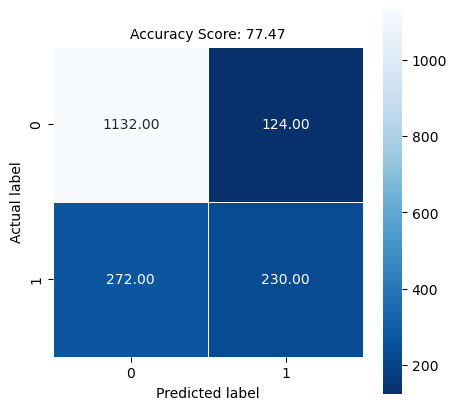

In [35]:
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(accuracy_rf)
plt.title(all_sample_title, size=10)

print("Confusion Matrix: \n", cm)

| Description |
|:--------|
|The above block code is used to generate a confusion matrix for the random forest classification model. This matrix is used to visualize the performance of the model in predicting the correct labels for the test data. The heatmap of the matrix shows the number of times the model predicted the correct label (in blue) and the number of times it predicted the incorrect label (in white). The accuracy score of the model is also printed.

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 8. Conclusion</p>


| Conclusion |
|:--------|
|The results obtained by using Random Forest model as the machine learning model for this churn prediction on the shared dataset show that the model has a good accuracy rate of 77.47%, precision of 64.97%, recall of 45.82%, and F1 score of 53.74%. The confusion matrix also indicates that the model is performing well, with 1,132 true positives, 230 true negatives, 124 false positives, and 272 false negatives.

Random Forest is a powerful machine learning model that is used for both regression and classification problems. It has several advantages over other models, such as its ability to handle large datasets and its ability to handle categorical features. Additionally, it is highly scalable and can be used to make predictions on unseen data. Furthermore, Random Forest is much less prone to overfitting than other models and can handle complex problems with many features. 

However, there are also some drawbacks to using Random Forest. For example, it can be computationally expensive, and can require more training time than other models. Additionally, it can be difficult to interpret the results of a Random Forest model, as the model is based on an ensemble of decision trees. 

In order to get the most out of this churn prediction, further analysis should be conducted to identify the most important features driving customer churn. Additionally, other machine learning models could be compared to the Random Forest model to see if any of them have better performance. Finally, different strategies could be tested to see if they have an effect on the customer churn rate. These strategies could involve increasing customer loyalty through promotions or discounts, or providing better customer service.

The score that should be used depends on the specific goal of the churn prediction model. For example, if the goal is to maximize the number of customers that are correctly identified as churners, then the recall score should be maximized. On the other hand, if the goal is to minimize the number of false positives (customers that are incorrectly identified as churners), then the precision score should be maximized.

Overall, the Random Forest model has provided promising results for this churn prediction, but further analysis and experimentation should be conducted in order to identify the best strategies for reducing customer churn.

In the end, according to some approaches from expert ML specialists: "The metrics alone aren’t enough to determine if our model is usable in real-life scenarios. (The definitive guide to Accuracy, Precision, and Recall for product developers, 2022)
we must establish a baseline score and compare our model’s performance against that baseline score." In the future, we’ll try to focus on this metric to assess how much these findings are practical with real data and similar datasets.

# <p style="background-color:green; font-family:calibri; font-size:120%; text-color:white; text-align:center;color:white" id="data"> 9. Reference</p>


* Brownlee, J. (2020) Data leakage in machine learning, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/data-leakage-machine-learning/ (Accessed: January 05, 2023). 

* Brownlee, J. (2021) Random oversampling and undersampling for imbalanced classification, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ (Accessed: January 01, 2023).

* Community.ibm.com. 2022. Telco customer churn (11.1.3+). [online] Available at: <https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113> [Accessed 19 August 2022].

* DEV Community 👩‍💻👨‍💻. 2022. The definitive guide to Accuracy, Precision, and Recall for product developers. [online] Available at: <https://dev.to/mage_ai/the-definitive-guide-to-accuracy-precision-and-recall-for-product-developers-4ahg> [Accessed 20 September 2022].

* Kaggle.com. 2022. Telco Customer Churn. [online] Available at: <https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv> [Accessed 19 August 2022].

* Sklearn.preprocessing.onehotencoder (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html (Accessed: January 12, 2023). 